In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Dataset

In this homework, we will use the California Housing Prices from Kaggle.

Here's a wget-able link:

In [2]:
!wget -O ./housing.csv https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-24 21:00:22--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘./housing.csv’

./housing.csv       100%[===================>]   1.36M  1.65MB/s    in 0.8s    

2023-09-24 21:00:23 (1.65 MB/s) - ‘./housing.csv’ saved [1423529/1423529]



The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

# EDA

- Load the data.
- Look at the median_house_value variable. Does it have a long tail?

In [3]:
file_name = 'housing.csv'
df = pd.read_csv(file_name)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Preparing the dataset

For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

- latitude
- longitude
- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income
- median_house_value

In [4]:
# Preparation of dataset by considering only the required features
df_subset = df[(df.ocean_proximity=='<1H OCEAN') | (df.ocean_proximity=='INLAND')]
df_subset = df_subset[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
df_subset

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [5]:
# Dataset
df_subset.reset_index(drop=True, inplace=True)
df_subset

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
15682,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


# Question 1

There's one feature with missing values. What is it?
- total_rooms
- total_bedrooms
- population
- households

In [6]:
# Answer 1
df_subset.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2

What's the median (50% percentile) for variable 'population'?
- 995
- 1095
- 1195
- 1295

In [7]:
# Answer 2
population_median = df_subset.population.median()
population_median

1195.0

# Prepare and split the dataset

- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [8]:
# Get indexes of datframe
idx = df_subset.index.values
idx

array([    0,     1,     2, ..., 15684, 15685, 15686])

In [9]:
# Changing order by using sedd value 42
np.random.seed(42)
np.random.shuffle(idx)
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [10]:
# Get number of indexes
n = len(idx)
n

15687

In [11]:
# Get number of training, validation and test records
n_val = int(n*.2)
n_test = int(n*.2)
n_train = n - n_val - n_test
print('n_train: ',n_train, ', n_val: ',n_val, ', n_test: ',n_test)

n_train:  9413 , n_val:  3137 , n_test:  3137


In [12]:
# Define indexes of training, validation and test data to extract from dataframe source
idx_train = idx[:n_train]
idx_val = idx[n_train:n_train+n_val]
idx_test = idx[n_train+n_val:]

<Axes: >

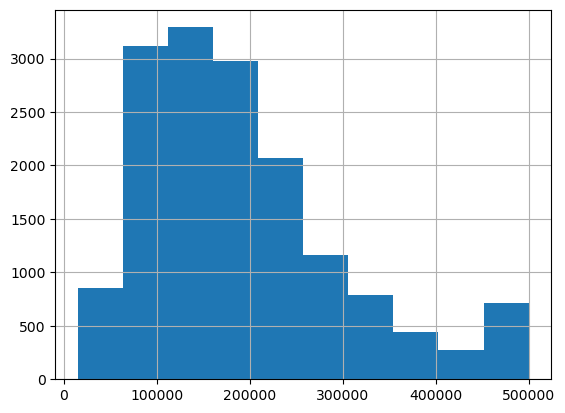

In [13]:
# Plot distribution of values for the variable 'median_house_value'
df_subset.median_house_value.hist()

<Axes: >

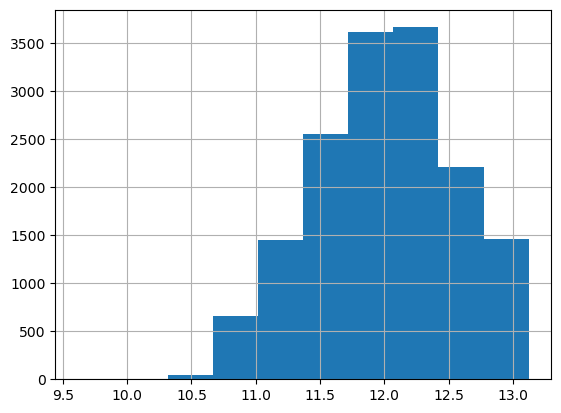

In [14]:
# Plot distribution of values for the variable 'median_house_value' changed by applying the function log(x+1)
df_subset.loc[:,'median_house_value']=df_subset.median_house_value.apply(lambda x: np.log1p(x),)
df_subset.median_house_value.hist()

In [15]:
# Definition of training, validation and test dataframes
df_subset_train = df_subset.iloc[idx_train]
df_subset_val = df_subset.iloc[idx_val]
df_subset_test = df_subset.iloc[idx_test]

In [16]:
# Show training dataframe
df_subset_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12249,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,11.161963
2221,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,12.321635
13538,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,12.471896
4696,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,12.359227
1229,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,12.574531
...,...,...,...,...,...,...,...,...,...
11774,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080,12.604516
10757,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,10.618910
11770,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546,13.122367
10402,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526,12.118885


# Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good


In [17]:
# Function for training linear regression
def training_linear_regression(X,Y):
    """
    Inputs:
        - X -> ndarray of shape (N,m+1) where N is the number of samples, qwhile , is the number of features
        - Y -> ndarray of shape (N,1)
        
    Output:
        - W -> weights matrix of shape (m+1,1)
    """
    # The analytical solution for weights is W = inv(X.T*X)*X.T*Y
    XTX = X.T@X
    XTX_inv = np.linalg.inv(XTX)
    W = XTX_inv@(X.T@Y)
    return W

In [18]:
# Funtion to apply linear regression
def linear_regression(X,W):
    """
    Inputs:
        . X -> ndarray of shape (N,m+1) where N is the number of samples, qwhile , is the number of features
        - W -> weights matrix of shape (m+1,1)
        
    Output:
        - Y -> ndarray of shape (N,1)
    """
    Y = X@W
    return Y

In [19]:
# Function to compute Root mean squared error
def RMSE(Y_true, Y_pred):
    """
    Inputs:
        - Y_true -> ndarray of shape (N,1). True values
        - Y_pred -> ndarray of shape (N,1). Values prediction
        
    Output:
        - rmse -> float Root mean squared error
    """
    rmse = round(np.sqrt(np.mean((Y_true - Y_pred)**2)),2)
    return rmse

## Dealing missing values with mean value

In [20]:
# Mean value of total_bedrooms variable
total_bed_mean = df_subset_train.total_bedrooms.mean().round(1)
# Creation of copy of dataframe
df_subset_train_1 = df_subset_train.copy()
# Dealing missing values with the mean values for the variable total_bedrooms
df_subset_train_1.loc[:,'total_bedrooms'] = df_subset_train_1.total_bedrooms.fillna(total_bed_mean)

In [21]:
# Definition of training data
Y_train = df_subset_train_1.loc[:,'median_house_value'].to_numpy().reshape(-1,1)
X_train_1 = df_subset_train_1.drop(columns=['median_house_value']).to_numpy()
X_train_1 = np.hstack((np.ones(X_train_1.shape[0]).reshape(-1,1), X_train_1))

In [22]:
# Creation of copy of dataframe
df_subset_val_1 = df_subset_val.copy()
# Dealing missing values with the mean values for the variable total_bedrooms
df_subset_val_1.loc[:,'total_bedrooms'] = df_subset_val_1.total_bedrooms.fillna(total_bed_mean)

In [23]:
# Definition of validation data
Y_val = df_subset_val_1.loc[:,'median_house_value'].to_numpy().reshape(-1,1)
X_val_1 = df_subset_val_1.drop(columns=['median_house_value']).to_numpy()
X_val_1 = np.hstack((np.ones(X_val_1.shape[0]).reshape(-1,1), X_val_1))

In [24]:
# Training data
W_1 = training_linear_regression(X_train_1, Y_train)
# Prediction values by using validation set
Y_val_pred_1 = linear_regression(X_val_1,W_1)
rmse_1 = RMSE(Y_val, Y_val_pred_1)
# print RMSE
print(f" RMSE: {rmse_1}")

 RMSE: 0.34


## Dealing missing values with 0

In [25]:
# Missing values with 0
# Training set
df_subset_train_2 = df_subset_train.copy()
df_subset_train_2.loc[:,'total_bedrooms'] = df_subset_train_2.total_bedrooms.fillna(0)
# Validation set
df_subset_val_2 = df_subset_val.copy()
df_subset_val_2.loc[:,'total_bedrooms'] = df_subset_val_2.total_bedrooms.fillna(0)

In [26]:
# Training data
X_train_2 = df_subset_train_2.drop(columns=['median_house_value']).to_numpy()
X_train_2 = np.hstack((np.ones(X_train_2.shape[0]).reshape(-1,1), X_train_2))
# Validation data
X_val_2 = df_subset_val_2.drop(columns=['median_house_value']).to_numpy()
X_val_2 = np.hstack((np.ones(X_val_2.shape[0]).reshape(-1,1), X_val_2))

In [27]:
# Training data
W_2 = training_linear_regression(X_train_2, Y_train)
# Prediction values by using validation set
Y_val_pred_2 = linear_regression(X_val_2,W_2)
rmse_2 = RMSE(Y_val, Y_val_pred_2)
print(f"RMSE: {rmse_2}")

RMSE: 0.34


# Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

- 0
- 0.000001
- 0.001
- 0.0001


In [28]:
# Function for the training with regularization
def training_linear_regression_reg(X,Y,r):
    """
    Inputs:
        - X -> ndarray of shape (N,m+1) where N is the number of samples, qwhile , is the number of features
        - Y -> ndarray of shape (N,1)
        - r -> float regularization parameter
        
    Output:
        - W -> weights matrix of shape (m+1,1)
    """
    # The analytical solution for weights is W = inv(X.T*X)*X.T*Y
    XTX = X.T@X
    XTX += r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    W = XTX_inv@(X.T@Y)
    return W

In [29]:
# List of values for regularization parameter
r_list =  [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
# For each value in r_list
for r in r_list:
    # training weights by using 0 to replace missing values
    W2_r = training_linear_regression_reg(X_train_2, Y_train, r)
    # Prediction of values by using validation dataset
    Y_val_pred = linear_regression(X_val_2, W2_r)
    # Compute RMSE
    rmse = RMSE(Y_val, Y_val_pred)
    print(f'r= {r} -> RMSE= {rmse}')

r= 0 -> RMSE= 0.34
r= 1e-06 -> RMSE= 0.34
r= 0.0001 -> RMSE= 0.34
r= 0.001 -> RMSE= 0.34
r= 0.01 -> RMSE= 0.34
r= 0.1 -> RMSE= 0.34
r= 1 -> RMSE= 0.34
r= 5 -> RMSE= 0.35
r= 10 -> RMSE= 0.35


# Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

# What's the value of std?
- 0.5
- 0.05
- 0.005
- 0.0005


In [30]:
# Definition of class for preparation of data
class PreparationData():
    """
    Class defined to prepare data.
    """
    def __init__(self, dataframe):
        """
        Constructor
            Inputs:
                - dataframe -> Dataframe of input
        """
        self.df = dataframe
        
    def fillna(self, **kwargs):
        """
        Method used to fill missing values
        """
        for key, value in kwargs.items():
            self.df.loc[:,key] = self.df[key].fillna(value)
        
    def split_dataframe(self, perc_train, perc_val, seed):
        """
        Method used to split the input dataframe in training, validation and test dataframe
        Inputs:
            - perc_train -> percentage of data for definition of training data
            - perc_val -> percentage of data for definition of validation data
            - seed -> seed number
        
        Outputs:
            - df_train -> Dataframe of training data
            - df_val -> Dataframe of validation data
            - df_test -> Dataframe of testing data
        """
        # Get indexes
        idx = self.df.index.values
        # using seed
        np.random.seed(seed)
        # shuffle data
        np.random.shuffle(idx)
        # get number of records
        n = len(idx)
        # get number of training records
        n_train = int(n*perc_train)
        # get number of validation records
        n_val = int(n*perc_val)
        # get number of testing records
        n_test = n - n_train - n_val
        # get indexes of training records
        idx_train = idx[:n_train]
        # get indexes of validation records
        idx_val = idx[n_train:n_train+n_val]
        # get indexes of testing records
        idx_test = idx[n_train+n_val:]
        # get training dataframe 
        df_train = df_subset.iloc[idx_train]
        # get validation dataframe
        df_val = df_subset.iloc[idx_val]
        # get testing dataframe
        df_test = df_subset.iloc[idx_test]
        # return dataframmes
        return df_train, df_val, df_test

In [31]:
class LinearRegression():
    """
    Class defined for linear regression
    """
    def __init__(self, n_features):
        """
        Constructor used to initialize the parameters "weights" of shape (n_features,1).
        """
        self.W = np.random.randn(n_features).reshape(-1,1)
        
    def training(self,X,Y, r=0.):
        """
        Method used for raining of weights
        Inputs:
            - X -> ndarray of shape (N,m+1) where N is the number of samples, qwhile , is the number of features
            - Y -> ndarray of shape (N,1)

        Output:
            - W -> weights matrix of shape (m+1,1)
        """
        # The analytical solution for weights is W = inv(X.T*X)*X.T*Y
        XTX = X.T@X
        if r > 0.:
            XTX += r*np.eye(XTX.shape[0])
        XTX_inv = np.linalg.inv(XTX)
        self.W = XTX_inv@(X.T@Y)
        
    def predict(self, X):
        """
        Method used to predict values from input values.
        """
        return X@self.W
    
    def RMSE(self, Y_true, Y_pred):
        """
        Method used to get value of Root mean squared error
        Inputs:
            - Y_true -> ndarray of shape (N,1)
            - Y_pred -> ndarray of shape (N,1) prediction

        Output:
            - rmse -> float root mean squared error
        """
        rmse = round(np.sqrt(np.mean((Y_true - Y_pred)**2)),2)
        return rmse

In [32]:
# Training for more seed values
seeds =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RMSEs = []
prepare_data_obj = PreparationData(df_subset)
kwargs = {'total_bedrooms':0}
prepare_data_obj.fillna(**kwargs)
perc_train, perc_val = .6, .2
for seed in seeds:
    df_train, df_val, df_test = prepare_data_obj.split_dataframe(perc_train, perc_val, seed)
    # training
    Y_train = df_train.loc[:,'median_house_value'].to_numpy().reshape(-1,1)
    X_train = df_train.drop(columns=['median_house_value']).to_numpy()
    X_train = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
    # validation
    Y_val = df_val.loc[:,'median_house_value'].to_numpy().reshape(-1,1)
    X_val = df_val.drop(columns=['median_house_value']).to_numpy()
    X_val = np.hstack((np.ones(X_val.shape[0]).reshape(-1,1), X_val))
    # testing
    Y_test = df_test.loc[:,'median_house_value'].to_numpy().reshape(-1,1)
    X_test = df_test.drop(columns=['median_house_value']).to_numpy()
    X_test = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))
    # Regression
    linearRegression_obj = LinearRegression(X_train.shape[1]-1)
    linearRegression_obj.training(X=X_train, Y=Y_train)
    Y_val_pred = linearRegression_obj.predict(X=X_val)
    RMSE = linearRegression_obj.RMSE(Y_true=Y_val, Y_pred=Y_val_pred)
    RMSEs.append(RMSE)
    print('seed =',seed, 'RMSE =',RMSE)

seed = 0 RMSE = 0.33
seed = 1 RMSE = 0.34
seed = 2 RMSE = 0.34
seed = 3 RMSE = 0.34
seed = 4 RMSE = 0.34
seed = 5 RMSE = 0.34
seed = 6 RMSE = 0.34
seed = 7 RMSE = 0.34
seed = 8 RMSE = 0.34
seed = 9 RMSE = 0.34


In [33]:
# Compute the standard deviation of all scores by rounding the result to 3 decimal digits 
print('std_scores =',round(np.std(RMSEs),3))

std_scores = 0.003


# Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:
- 0.13
- 0.23
- 0.33
- 0.43

In [34]:
# Split the dataset like previously, use seed 9
seed = 9
perc_train, perc_val = .6, .2
df_train, df_val, df_test = prepare_data_obj.split_dataframe(perc_train, perc_val, seed)
# training data
Y_train = df_train.loc[:,'median_house_value'].to_numpy().reshape(-1,1)
X_train = df_train.drop(columns=['median_house_value']).to_numpy()
X_train = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
# validation data
Y_val = df_val.loc[:,'median_house_value'].to_numpy().reshape(-1,1)
X_val = df_val.drop(columns=['median_house_value']).to_numpy()
X_val = np.hstack((np.ones(X_val.shape[0]).reshape(-1,1), X_val))
# Combine validation and training dataset
X_train = np.vstack((X_train,X_val))
Y_train = np.vstack((Y_train, Y_val))
# testing data
Y_test = df_test.loc[:,'median_house_value'].to_numpy().reshape(-1,1)
X_test = df_test.drop(columns=['median_house_value']).to_numpy()
X_test = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))
# Traing linear regression with regularization parameter r=0.001
linearRegression_obj = LinearRegression(X_train.shape[1]-1)
linearRegression_obj.training(X=X_train, Y=Y_train, r=.001)
# Prediction values for testing data
Y_test_pred = linearRegression_obj.predict(X=X_test)
# Compute RMSE for testing data
RMSE = linearRegression_obj.RMSE(Y_true=Y_test, Y_pred=Y_test_pred)
    
print('RMSE = ',RMSE)

RMSE =  0.34
